In [1]:
import pandas as pd
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('case_study_data_ver1.csv', sep = ';')#,encoding = 'ISO-8859-1', decimal = ',')

In [85]:
outtakes_0 = df[df.QTY.str.contains('[a-zA-Z]')]
len(outtakes_0)

203

In [86]:
outtakes_0.head()

,ITEM_ID,DATE_ID,STORE_ID,CAT_DAYOFWEEK,DUM_HOLIDAY,DUM_FREEWEEKDAY,DUM_WORKSATURDAY,DUM_HOLIDAY_SNGL,DUM_HOLIDAY_WHIT,DUM_HOLIDAY_XMAS,...,NUM_HOLIDAY_WHIT_TO,NUM_HOLIDAY_XMAS_FROM,NUM_HOLIDAY_XMAS_TO,NUM_SCHOOLBREAK_FROM_END,NUM_SCHOOLBREAK_TO_START,NUM_SCHOOLBREAK_FROM_START,NUM_SCHOOLBREAK_TO_END,QTY,PRICE,CUSTOMER
3599,0.0,8.0,21.0,5,0,0,0,0,0,0,...,127.0,15.0,351.0,7.0,75.0,0.0,0.0,21. Sep,828.46,2842.0
15830,0.0,31.0,40.0,0,0,0,0,0,0,0,...,104.0,38.0,328.0,30.0,52.0,0.0,0.0,Jan 52,828.19,1599.0
24125,0.0,46.0,4.0,1,0,0,0,0,0,0,...,89.0,53.0,313.0,45.0,37.0,0.0,0.0,Mai 89,828.48,1915.0
61280,0.0,113.0,38.0,5,0,0,0,0,0,0,...,22.0,120.0,246.0,26.0,54.0,0.0,0.0,Apr 56,828.41,2401.0
63254,0.0,116.0,26.0,1,0,0,0,0,0,0,...,19.0,123.0,243.0,29.0,51.0,0.0,0.0,03. Apr,828.52,1855.0


In [89]:
outtakes_0.groupby(['ITEM_ID']).size().reset_index(name='Number of Rows')

,ITEM_ID,Number of Rows
0,0.0,129
1,15.0,4
2,17.0,68


In [132]:
for digit in range(5):
    print('For {} digits behind the dot:'.format(digit+1))#+'\.' + (digit+1) * '\d' + '$')
    pattern = '\.' + (digit+1) * '\d' + '$'
    outtakes = df[df.QTY.str.contains(pattern)]
    print('{} rows ~ {}% of the given data'.format(len(outtakes),round(len(outtakes)/len(df)*100,2)))
    print('Sample: \n', outtakes[:1])
    grp = outtakes.groupby(['ITEM_ID']).size().reset_index(name='Number of Rows')\
         .sort_values('Number of Rows', ascending=False)
    print(grp[:3])
    if len(grp) > 4:
        print(grp[-3:])
    print()

For 1 digits behind the dot:
893668 rows ~ 91.19% of the given data
Sample: 
     ITEM_ID  DATE_ID  STORE_ID  CAT_DAYOFWEEK  DUM_HOLIDAY  DUM_FREEWEEKDAY  \
47      2.0      1.0       0.0              5            0                0   

    DUM_WORKSATURDAY  DUM_HOLIDAY_SNGL  DUM_HOLIDAY_WHIT  DUM_HOLIDAY_XMAS  \
47                 0                 0                 0                 0   

    ...  NUM_HOLIDAY_WHIT_TO  NUM_HOLIDAY_XMAS_FROM  NUM_HOLIDAY_XMAS_TO  \
47  ...                134.0                    8.0                358.0   

    NUM_SCHOOLBREAK_FROM_END  NUM_SCHOOLBREAK_TO_START  \
47                       0.0                       0.0   

    NUM_SCHOOLBREAK_FROM_START  NUM_SCHOOLBREAK_TO_END  QTY   PRICE  CUSTOMER  
47                        15.0                     1.0  9.0  355.95    2155.0  

[1 rows x 35 columns]
    ITEM_ID  Number of Rows
6       6.0           60959
12     12.0           60875
5       5.0           60846
    ITEM_ID  Number of Rows
0       0.0  

In [133]:
for key in list(df.keys())[:3]:
    for digit in range(5):
        print('For {} digits behind the dot:'.format(digit+1))#+'\.' + (digit+1) * '\d' + '$')
        pattern = '\.' + (digit+1) * '\d' + '$'
        outtakes = df[df.QTY.str.contains(pattern)]
        print('{} rows ~ {}% of the given data'.format(len(outtakes),round(len(outtakes)/len(df)*100,2)))
        grp = outtakes.groupby([key]).size().reset_index(name='Number of Rows')\
             .sort_values('Number of Rows', ascending=False)
        print(grp[:3])
        if len(grp) > 4:
            print(grp[-3:])
        print()
    

For 1 digits behind the dot:
893668 rows ~ 91.19% of the given data
    ITEM_ID  Number of Rows
6       6.0           60959
12     12.0           60875
5       5.0           60846
    ITEM_ID  Number of Rows
0       0.0              55
16     17.0              24
15     15.0               1

For 2 digits behind the dot:
53 rows ~ 0.01% of the given data
   ITEM_ID  Number of Rows
0      0.0              31
3     17.0              13
1     15.0               8

For 3 digits behind the dot:
85999 rows ~ 8.78% of the given data
   ITEM_ID  Number of Rows
0      0.0           57584
3     17.0           25587
1     15.0            2289

For 4 digits behind the dot:
31 rows ~ 0.0% of the given data
   ITEM_ID  Number of Rows
1     16.0              20
0     15.0              10
2     17.0               1

For 5 digits behind the dot:
0 rows ~ 0.0% of the given data
Empty DataFrame
Columns: [ITEM_ID, Number of Rows]
Index: []

For 1 digits behind the dot:
893668 rows ~ 91.19% of the given dat

In [3]:
df['QTY']=df['QTY'].astype(str)
patterns = []
proportion = []
n_rows = []
samples = []
for digit in range(4):
#     print('For {} digits behind the dot:'.format(digit+1))#+'\.' + (digit+1) * '\d' + '$')
    pattern = '\.' + (digit+1) * '\d' + '$'
    outtakes = df[df.QTY.str.contains(pattern)]
    patterns.append(pattern)
    n_rows.append(len(outtakes))
    proportion.append(' {}%'.format(round(len(outtakes)/len(df)*100,2)))
    samples.append(outtakes.QTY.values[0])

patterns.append('[a-zA-Z]')
outtakes = df[df.QTY.str.contains('[a-zA-Z]')]
n_rows.append(len(outtakes))
proportion.append(' {}%'.format(round(len(outtakes)/len(df)*100,2)))
samples.append(outtakes.QTY.values[0])

df_digits = pd.DataFrame({'pattern':patterns,
                          'n_rows':n_rows,
                          'proportion':proportion,
                          'sample':samples}).sort_values('n_rows', ascending=False)
df_digits.head()

ValueError: cannot index with vector containing NA / NaN values

Since the patterns '\.\d\d$',"\.\d\d\d\d$" and '[a-zA-Z]' make less than 1% of the data. We'll exclude them here and clean up the rest.

In [150]:
outtakes = df[df.QTY.str.contains('[a-zA-Z]|\.\d\d$|\.\d\d\d\d$')]
len(outtakes)

287

In [151]:
print(len(df))
df = df.drop(outtakes.index)
print(len(df))

979971
979684


In [ ]:
#Clean QTY
df['QTY'] = df['QTY'].astype(str)
df['QTY'] = df['QTY'].apply(lambda x: re.sub('\.','',re.sub('\..$','',x))).astype(float)

In [167]:
#Getting rid of completely empty cols
df = df.drop([key for key in list(df.keys()) if df[key].sum()==0], axis=1)

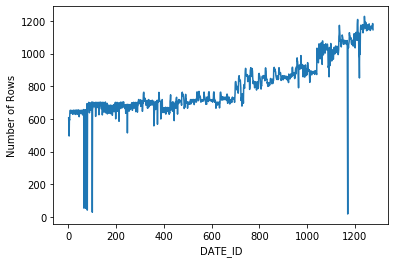

In [168]:
plt.plot('DATE_ID','Number of Rows', data = df.groupby(['DATE_ID']).size().\
         reset_index(name='Number of Rows'))
plt.ylabel('Number of Rows')
plt.xlabel('DATE_ID')
plt.show()

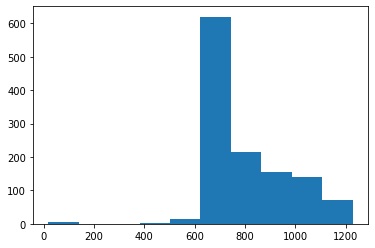

In [165]:
plt.hist(df.groupby(['DATE_ID']).size().reset_index(name='Number of Rows')['Number of Rows'])
plt.show()

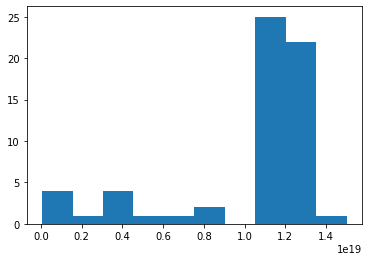

In [175]:
plt.hist(df.groupby(['STORE_ID'])['QTY'].sum().reset_index(name='sum(QTY)')['sum(QTY)'])
plt.show()

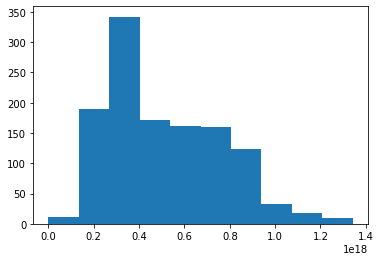

In [176]:
plt.hist(df.groupby(['DATE_ID'])['QTY'].sum().reset_index(name='sum(QTY)')['sum(QTY)'])
plt.show()

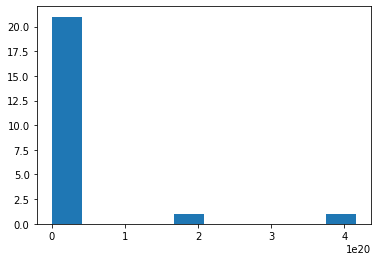

In [177]:
plt.hist(df.groupby(['ITEM_ID'])['QTY'].sum().reset_index(name='sum(QTY)')['sum(QTY)'])
plt.show()

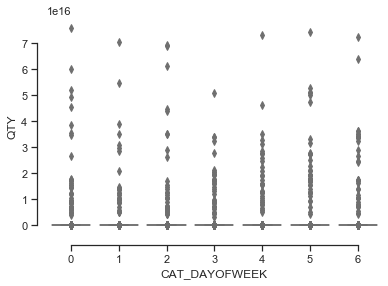

In [195]:
# sns.set(style="ticks", palette="pastel")

# Load the example tips dataset
# tips = sns.load_dataset("tips")

# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="CAT_DAYOFWEEK", y="QTY",
#             hue="smoker", 
#             palette=["m", "g"],
            data=df.sample(frac=0.01))
sns.despine(offset=10, trim=True)

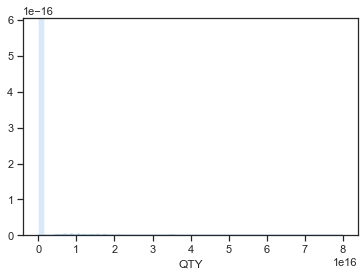

In [196]:
sns.distplot(df.QTY)

In [166]:
df.describe()

,ITEM_ID,DATE_ID,STORE_ID,CAT_DAYOFWEEK,DUM_HOLIDAY,DUM_FREEWEEKDAY,DUM_WORKSATURDAY,DUM_HOLIDAY_SNGL,DUM_HOLIDAY_WHIT,DUM_HOLIDAY_XMAS,...,NUM_HOLIDAY_WHIT_TO,NUM_HOLIDAY_XMAS_FROM,NUM_HOLIDAY_XMAS_TO,NUM_SCHOOLBREAK_FROM_END,NUM_SCHOOLBREAK_TO_START,NUM_SCHOOLBREAK_FROM_START,NUM_SCHOOLBREAK_TO_END,QTY,PRICE,CUSTOMER
count,979684.000000,979684.000000,979684.000000,979684.000000,979684.0,979684.000000,979684.000000,979684.0,979684.0,979684.0,...,956458.000000,979684.000000,979684.000000,979684.000000,979684.000000,979684.000000,979684.000000,9.796840e+05,979684.000000,979665.000000
mean,9.137308,706.259016,25.649254,3.000419,0.0,0.006773,0.007173,0.0,0.0,0.0,...,172.502474,171.997426,193.232586,28.417950,28.417624,7.190019,8.412253,6.340210e+14,691.019655,2129.728307
std,5.559359,369.521918,15.521356,1.960449,0.0,0.082017,0.084388,0.0,0.0,0.0,...,109.282972,103.657547,103.607123,26.643055,26.598315,17.391851,19.454426,4.501655e+15,289.325799,657.485494
min,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,132.900000,256.000000
25%,5.000000,390.000000,12.000000,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,78.000000,84.000000,106.000000,2.000000,1.000000,0.000000,0.000000,7.000000e+00,481.950000,1650.000000
50%,9.000000,744.000000,25.000000,3.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,163.000000,163.000000,202.000000,24.000000,24.000000,0.000000,0.000000,1.200000e+01,628.950000,2084.000000
75%,13.000000,1037.000000,39.000000,5.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,...,266.000000,260.000000,281.000000,46.000000,46.000000,0.000000,0.000000,2.500000e+01,838.950000,2522.000000
max,22.000000,1276.000000,60.000000,6.000000,0.0,1.000000,1.000000,0.0,0.0,0.0,...,383.000000,365.000000,363.000000,106.000000,106.000000,78.000000,78.000000,7.985700e+16,1678.950000,7053.000000


In [47]:
df.PRICE[:10]

47580      828.44
15732     1678.95
49758     1101.45
455000     576.45
508945     838.94
613313     891.45
808181     397.95
643066     292.95
317132    1048.95
163367    1048.95
Name: PRICE, dtype: float64

In [64]:
df.QTY[:10].values

array(['5.744.649.999.999.990', '86.0', '1.0', '10.0',
       '64.087.000.000.000.000', '36.0', '88.0', '10.0', '5.0', '4.0'],
      dtype=object)

In [65]:
df.QTY.values[0]

'5.744.649.999.999.990'

In [80]:
examples = ['5.744.649.999.999.990', '86.0', '1.0', '10.0', 
            '64.087.000.000.000.000', '36.0', '88.0', '10.0', '5.0', '4.0']
def rm_zeros(string):
    """
    '86.0' -> '86'
    """
#     re.sub('\.','')
    return re.sub('\.','',re.sub('\..$','',string))

for example in examples:
    print(rm_zeros(example))

5744649999999990
86
1
10
64087000000000000
36
88
10
5
4


In [84]:
p = re.compile('[a-zA-Z]')
for row in list(df.QTY.values):
    if len(p.findall(row)) > 0:
        print(row)

21. Sep
Jan 52
Mai 89
Apr 56
03. Apr
Jan 52
Apr 56
Apr 56
Jan 52
13. Nov
Jan 52
Mai 89
03. Apr
Okt 83
Mrz 23
Jan 52
Jan 52
Aug 93
Mrz 61
Apr 56
Jan 52
Apr 56
Jan 52
28. Dez
Jul 22
Jan 52
Jun 46
07. Mrz
07. Mrz
Okt 26
Mai 13
Mrz 42
14. Jun
07. Mrz
Jun 46
21. Sep
07. Mrz
07. Mrz
14. Jun
21. Sep
Jun 84
Aug 93
Jun 46
Jan 52
Mrz 23
Mrz 23
21. Sep
Jun 27
Dez 73
14. Jun
Aug 93
Aug 93
03. Apr
Jul 22
07. Mrz
11. Feb
14. Jun
07. Mrz
07. Mrz
Dez 16
Dez 16
Mrz 42
Aug 36
07. Mrz
Mrz 42
nan
07. Mrz
Mrz 23
Jul 22
Mai 13
Jan 52
03. Apr
Jan 71
Jan 52
07. Mrz
07. Mrz
Nov 21
Jul 22
Okt 83
07. Mrz
07. Mrz
03. Apr
Jan 52
06. Aug
Mai 89
06. Aug
06. Aug
Jan 71
09. Dez
Jan 52
Jan 52
Jan 71
Jul 22
Jun 27
Okt 26
15. Jan
Jun 46
Nov 97
13. Nov
13. Nov
Mrz 42
Aug 36
Sep 31
Mai 13
Jan 71
Jan 52
Jan 52
Apr 56
03. Apr
03. Apr
Mrz 23
Jun 84
07. Mrz
Okt 26
07. Mrz
Mai 13
Jan 71
07. Mrz
Mrz 61
Dez 16
Aug 36
Mai 13
Aug 93
Nov 78
Jan 71
Mrz 23
09. Dez
Nov 78
Mai 13
Apr 56
Mrz 23
07. Mrz
Aug 93
Jan 71
Okt 26
Mrz 42
Okt 26


In [62]:
for key in list(df.keys()):
    print(key+'\n',df[key][:5],'\n')

ITEM_ID
 47580      0.0
15732     13.0
49758      4.0
455000    18.0
508945    17.0
Name: ITEM_ID, dtype: float64 

DATE_ID
 47580      90.0
15732      29.0
49758      94.0
455000    696.0
508945    766.0
Name: DATE_ID, dtype: float64 

STORE_ID
 47580      7.0
15732     26.0
49758      3.0
455000     9.0
508945    39.0
Name: STORE_ID, dtype: float64 

CAT_DAYOFWEEK
 47580     3
15732     5
49758     0
455000    0
508945    0
Name: CAT_DAYOFWEEK, dtype: int64 

DUM_HOLIDAY
 47580     0
15732     0
49758     0
455000    0
508945    0
Name: DUM_HOLIDAY, dtype: int64 

DUM_FREEWEEKDAY
 47580     0
15732     0
49758     0
455000    0
508945    0
Name: DUM_FREEWEEKDAY, dtype: int64 

DUM_WORKSATURDAY
 47580     0
15732     0
49758     0
455000    0
508945    0
Name: DUM_WORKSATURDAY, dtype: int64 

DUM_HOLIDAY_SNGL
 47580     0
15732     0
49758     0
455000    0
508945    0
Name: DUM_HOLIDAY_SNGL, dtype: int64 

DUM_HOLIDAY_WHIT
 47580     0
15732     0
49758     0
455000    0
508945    0


In [63]:
for key in list(df.keys()):
    print(key+': ',type(df[key][0]))

ITEM_ID:  <class 'numpy.float64'>
DATE_ID:  <class 'numpy.float64'>
STORE_ID:  <class 'numpy.float64'>
CAT_DAYOFWEEK:  <class 'numpy.int64'>
DUM_HOLIDAY:  <class 'numpy.int64'>
DUM_FREEWEEKDAY:  <class 'numpy.int64'>
DUM_WORKSATURDAY:  <class 'numpy.int64'>
DUM_HOLIDAY_SNGL:  <class 'numpy.int64'>
DUM_HOLIDAY_WHIT:  <class 'numpy.int64'>
DUM_HOLIDAY_XMAS:  <class 'numpy.int64'>
DUM_SPRINGBREAK:  <class 'numpy.int64'>
DUM_SUMMERBREAK:  <class 'numpy.int64'>
DUM_FALLBREAK:  <class 'numpy.int64'>
DUM_WINTERBREAK:  <class 'numpy.int64'>
DUM_WORKDAY:  <class 'numpy.int64'>
NUM_WORKDAYS_THISWEEK:  <class 'numpy.int64'>
NUM_WORKDAYS_PASTWEEK:  <class 'numpy.float64'>
NUM_WORKDAYS_NEXTWEEK:  <class 'numpy.float64'>
NUM_WORKDAYS_PAST7DAY:  <class 'numpy.float64'>
NUM_WORKDAYS_FRWD7DAY:  <class 'numpy.float64'>
NUM_HOLIDAY_FROM:  <class 'numpy.float64'>
NUM_HOLIDAY_TO:  <class 'numpy.float64'>
NUM_HOLIDAY_SNGL_FROM:  <class 'numpy.float64'>
NUM_HOLIDAY_SNGL_TO:  <class 'numpy.float64'>
NUM_HOLID

In [153]:
# for key in list(df.keys()):
#     print(key,df[key].sum())

# drop = []
# for key in list(df.keys()):
#     if df[key].sum()==0:
#         drop.append(key)
# print(drop)

drop = [key for key in list(df.keys()) if df[key].sum()==0]
drop

['DUM_HOLIDAY', 'DUM_HOLIDAY_SNGL', 'DUM_HOLIDAY_WHIT', 'DUM_HOLIDAY_XMAS']

In [ ]:
df = df.drop(drop, axis=1)

In [ ]:
#Rows/sales per store over time
list(df.keys())

In [163]:

grp = df.groupby(['STORE_ID'], as_index = False)['QTY'].sum().sort_values('QTY',ascending=False)
# grp['QTY']=grp['QTY'].astype(float) # large numbers to str?
grp.head()


# plt.plot('DATE_ID','Number of Rows', data = df.groupby(['DATE_ID']).df.QTY.sum().\
#          reset_index(name='Number of Rows'))
# plt.ylabel('Number of Rows')
# plt.xlabel('DATE_ID')
# plt.show()

,STORE_ID,QTY
39,39.0,1.501084e+19
6,6.0,1.306989e+19
1,1.0,1.284233e+19
26,26.0,1.269397e+19
24,24.0,1.243520e+19


In [19]:
# sns.lineplot(x='DATE_ID', y='QTY', data=grp)
type(grp.QTY[0])

str